In [1]:
import simtool as st

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
a1 , a2 , e , K , a = 0.088 , 0.020 , 0.96, 0.034, 0.086
params = [a1, a2, e, K, a]
param_names = ["a1", "a2", "e", "K", "a"]
t_max = 500 #days
x0, y0 = 0.12, 0.91
state_0 = [x0, y0]
data = st.data_gen(params, t_max, state_0, func_rep = 'holling1')
nbpoint = 20
noise_intensity = 0.03
noise_seed = 123

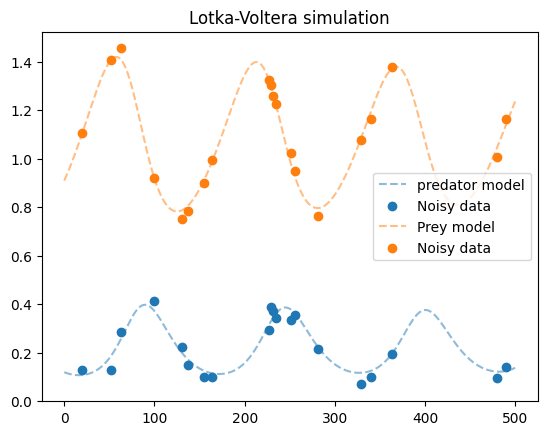

In [3]:
data.get_data(nbpoint=nbpoint, noise_intensity=noise_intensity, plot_data=True,noise_seed = noise_seed)

In [4]:
fixparam = [False,False,False,True,False,False,False]
fpinn = st.fixed_pinn(data,fixparam)
fpinn.get_train_data()
bc_weights = [5,5]
data_weights = [0.2,0.2] #car données tres bruitées
pde_weights = [10,10] #car données tres bruitées
poids_p1 = [0] * 2 + bc_weights + data_weights
poids_p2 = pde_weights + bc_weights + data_weights
poids = [poids_p1,poids_p2]
lr = 1e-5

In [5]:
print (fpinn.train_param)

[<tf.Variable 'Variable:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=() dtype=float32_ref>]


In [ ]:
fpinn.compile_model(lr=lr,poids = poids,path_file_var = "tparam_fixedpinn.dat",niter_p1=1000,niter_p2=750000)

Partie 1 de l'entrainement
Compiling model...
Building feed-forward neural network...
'build' took 0.023083 s



/opt/homebrew/lib/python3.11/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.290898 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 2.32e+02, 8.98e+01]    [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 2.32e+02, 8.98e+01]    []  


2024-02-11 18:42:17.724058: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


1000      [0.00e+00, 0.00e+00, 5.66e-02, 2.87e+00, 1.22e-02, 2.87e-02]    [0.00e+00, 0.00e+00, 5.66e-02, 2.87e+00, 1.22e-02, 2.87e-02]    []  

Best model at step 1000:
  train loss: 2.97e+00
  test loss: 2.97e+00
  test metric: []

'train' took 1.836753 s

Partie 2 de l'entrainement
Compiling model...
'compile' took 0.167729 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1000      [4.72e-04, 1.13e-02, 5.66e-02, 2.87e+00, 1.22e-02, 2.87e-02]    [4.72e-04, 1.13e-02, 5.66e-02, 2.87e+00, 1.22e-02, 2.87e-02]    []  


2024-02-11 18:42:19.774649: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_3/bias/Adam_3/Assign' id:2857 op device:{requested: '', assigned: ''} def:{{{node dense_3/bias/Adam_3/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@dense_3/bias"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](dense_3/bias/Adam_3, dense_3/bias/Adam_3/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2000      [1.43e-04, 5.38e-03, 2.55e-03, 6.02e-01, 3.98e-03, 5.90e-03]    [1.43e-04, 5.38e-03, 2.55e-03, 6.02e-01, 3.98e-03, 5.90e-03]    []  
3000      [8.79e-05, 2.19e-03, 6.08e-06, 8.59e-04, 2.57e-03, 4.76e-03]    [8.79e-05, 2.19e-03, 6.08e-06, 8.59e-04, 2.57e-03, 4.76e-03]    []  
4000      [4.91e-05, 7.25e-04, 3.74e-08, 1.38e-08, 2.14e-03, 4.49e-03]    [4.91e-05, 7.25e-04, 3.74e-08, 1.38e-08, 2.14e-03, 4.49e-03]    []  
5000      [3.97e-05, 2.66e-04, 1.12e-08, 4.72e-10, 1.92e-03, 4.40e-03]    [3.97e-05, 2.66e-04, 1.12e-08, 4.72e-10, 1.92e-03, 4.40e-03]    []  
6000      [5.43e-05, 1.54e-04, 4.39e-09, 3.21e-09, 1.99e-03, 4.53e-03]    [5.43e-05, 1.54e-04, 4.39e-09, 3.21e-09, 1.99e-03, 4.53e-03]    []  
7000      [4.47e-05, 1.72e-04, 2.86e-09, 3.66e-09, 1.79e-03, 4.33e-03]    [4.47e-05, 1.72e-04, 2.86e-09, 3.66e-09, 1.79e-03, 4.33e-03]    []  
8000      [4.42e-05, 1.62e-04, 1.67e-09, 3.49e-09, 1.76e-03, 4.30e-03]    [4.42e-05, 1.62e-04, 1.67e-09, 3.49e-09, 1.76e-03, 4.30e-03]    []  

In [ ]:
displayer = st.displayer(fpinn)
displayer.plot_convergence()

In [ ]:
solversp = st.model_scipy(data)
displayer.plot_tlong(solversp)